In [1]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from panel.interact import interact
import os
from pathlib import Path
from dotenv import load_dotenv


Bad key "text.kerning_factor" on line 4 in
C:\Users\panka\OneDrive\Documents\Downloads\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
load_dotenv()
mapbox_api = os.getenv("MAPBOX_API_KEY")
#print(mapbox_api)
px.set_mapbox_access_token(mapbox_api)

In [3]:
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

Housing Units Per Year

In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!

housing_units = sfo_data['housing_units'].groupby("year").mean()
housing_units.head()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
Name: housing_units, dtype: int64

Text(0.5, 1.0, 'Housing Units in San Francisco from 2010 to 2016')

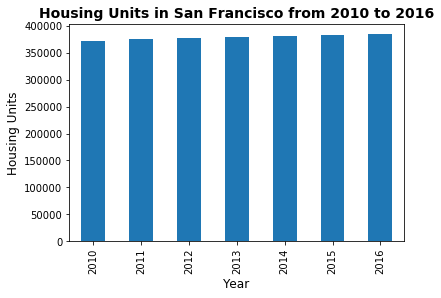

In [5]:
fig_housing_units = plt.figure()
plot_housing_units = housing_units.plot.bar()
plot_housing_units.set_xlabel("Year", fontsize=12)
plot_housing_units.set_ylabel("Housing Units", fontsize=12)
plot_housing_units.set_title(
    "Housing Units in San Francisco from 2010 to 2016", fontsize=14, fontweight="bold"
)

In [6]:
housing_units_std = housing_units.std()
housing_units_min = min(housing_units)
housing_units_max = max(housing_units)
plot_housing_units.set_ylim(
    housing_units_min - housing_units_std, housing_units_max + housing_units_std
)
plt.show()
plt.close(fig_housing_units)

In [7]:
df_avg_costs = (
    sfo_data[["sale_price_sqr_foot", "gross_rent"]]
    .groupby(sfo_data.index)
    .mean()
)

In [8]:
df_avg_costs.head()

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528

In [9]:
df_avg_costs.hvplot()

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [10]:
df_avg_costs.hvplot(x="year", y="gross_rent", rot=90).opts(
    yformatter="%.0f", title="Average Gross Rent in San Francisco"
)

:Curve   [year]   (gross_rent)

In [11]:
df_avg_costs.hvplot(x="year", y="sale_price_sqr_foot", rot=90).opts(
    yformatter="%.0f", title="Average Sales Price per Year"
)

:Curve   [year]   (sale_price_sqr_foot)

Average Prices by Neighborhood

In [12]:
sfo_data_grp = (
    sfo_data[['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent']]
    .groupby([sfo_data.index, 'neighborhood'])
    .mean()
    .reset_index()
)
sfo_data_grp.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [13]:
#def sfo_data_grp(neighborhood):
    #return neighborhood

In [14]:
sfo_data_grp.hvplot(x="year", y="sale_price_sqr_foot", rot=90).opts(
    yformatter="%.0f", title="Average Sales Price per Year")

:Curve   [year]   (sale_price_sqr_foot)

In [15]:
top_10_neighborhood = sfo_data_grp.nlargest(10, "sale_price_sqr_foot")

In [16]:
top_10_neighborhood

year               neighborhood  sale_price_sqr_foot  housing_units  \
346  2015      Union Square District          2258.702832         382295   
388  2016           Presidio Heights          1465.968586         384242   
374  2016             Merced Heights          1416.666667         384242   
226  2013      Union Square District          1290.472107         378401   
262  2014              Miraloma Park          1267.766203         380348   
386  2016  Parnassus/Ashbury Heights          1207.997485         384242   
382  2016            Outer Richmond           1196.645437         384242   
323  2015                     Marina          1132.837361         382295   
282  2014            South of Market          1119.838877         380348   
300  2015             Corona Heights          1100.791194         382295   

     gross_rent  
346        3739  
388        4390  
374        4390  
226        2971  
262        3528  
386        4390  
382        4390  
323        3739  
282        3528  
300        3739

In [17]:
top_10_neighborhood.hvplot(x="neighborhood", y="sale_price_sqr_foot", rot=90).opts(
    yformatter="%.0f", title="Top 10 Expensive Neighborhood")

:Curve   [neighborhood]   (sale_price_sqr_foot)

Parallel Coordinates and Parallel Categories Analysis

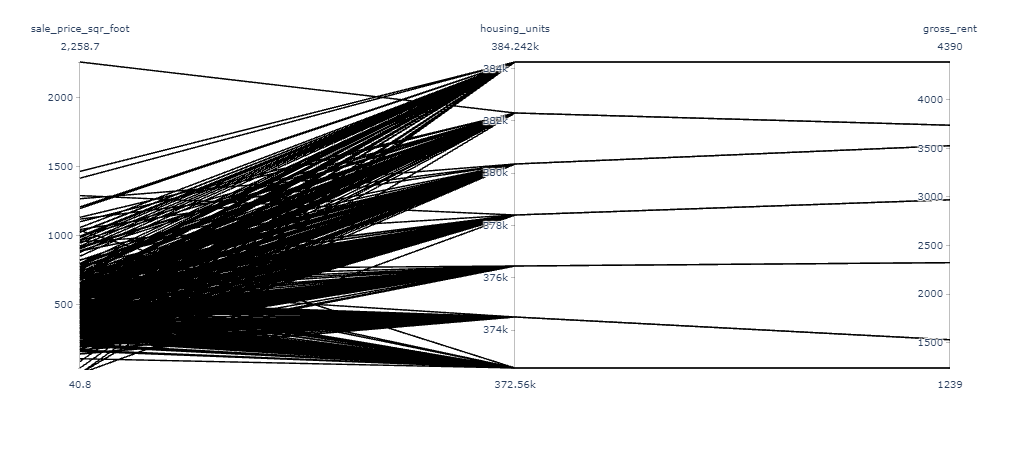

In [18]:
#  Parallel Coordinates Plot
# YOUR CODE HERE!
px.parallel_coordinates(sfo_data, color='neighborhood')

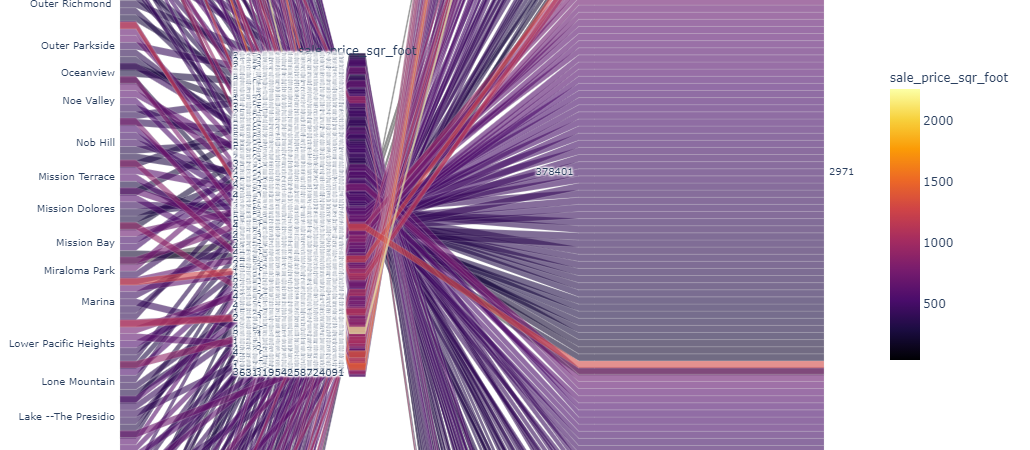

In [19]:
 # Parallel Categories Plot
# YOUR CODE HERE!
px.parallel_categories(
    sfo_data,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood",
        "sale_price_sqr_foot",
        "housing_units",
        "gross_rent",
    },
)

Neighborhood Map

In [20]:
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

In [21]:
mean_units = pd.merge(left = df_neighborhood_locations, right = sfo_data, left_on='Neighborhood', right_on='neighborhood')
mean_units = mean_units.drop(columns=["neighborhood"])
mean_units.head()

Neighborhood        Lat       Lon  sale_price_sqr_foot  housing_units  \
0  Alamo Square  37.791012 -122.4021           291.182945         372560   
1  Alamo Square  37.791012 -122.4021           272.527310         374507   
2  Alamo Square  37.791012 -122.4021           183.099317         376454   
3  Alamo Square  37.791012 -122.4021           387.794144         378401   
4  Alamo Square  37.791012 -122.4021           484.443552         380348   

   gross_rent  
0        1239  
1        1530  
2        2324  
3        2971  
4        3528

In [22]:
data = mean_units[[
    "Neighborhood", "Lat", "Lon", "sale_price_sqr_foot", "housing_units", "gross_rent"
]]
data.head()

Neighborhood        Lat       Lon  sale_price_sqr_foot  housing_units  \
0  Alamo Square  37.791012 -122.4021           291.182945         372560   
1  Alamo Square  37.791012 -122.4021           272.527310         374507   
2  Alamo Square  37.791012 -122.4021           183.099317         376454   
3  Alamo Square  37.791012 -122.4021           387.794144         378401   
4  Alamo Square  37.791012 -122.4021           484.443552         380348   

   gross_rent  
0        1239  
1        1530  
2        2324  
3        2971  
4        3528

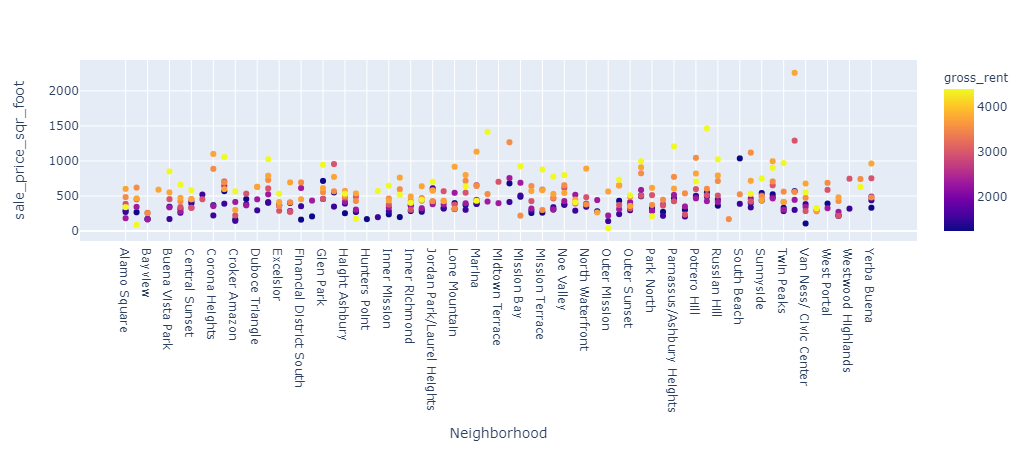

In [23]:
px.scatter(
    data,
    x ="Neighborhood",
    y ="sale_price_sqr_foot",
    color="gross_rent"
)

In [24]:
map_plot = px.scatter_mapbox(
    data,
    lat = "Lat",
    lon = "Lon",
    color = "gross_rent",
    zoom = 4
)
map_plot.show()